# 📊 Modelo 2: Regresión Logística
## Clasificación de Categorías de Valor de Exportación

---

## 🎯 Objetivo del Modelo

**Clasificar las exportaciones** en categorías de valor: Bajo, Medio, Alto, Muy Alto

## 📊 Tipo de Problema

**Clasificación Multiclase** - Predecir categorías discretas

## 🔢 Variables del Modelo

### Variable Dependiente (Target):
- **Categoria_Valor**: Clasificación del valor FOB (Bajo/Medio/Alto/Muy Alto)

### Variables Independientes (Features):
- Peso en kilos netos
- Peso en kilos brutos  
- Cantidad(es)
- Número de artículos
- Precio Unitario FOB
- País, Continente, Departamento (encoded)
- Vía de transporte (encoded)
- Ratios calculados

In [22]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import pickle

print('✅ Librerías importadas')

✅ Librerías importadas


In [32]:
# Cargar datos
df = pd.read_csv('data_processed.csv')
print(f'📊 Datos cargados: {df.shape}')

# Definir variables
target = 'Categoria_Valor'
features = ['Peso en kilos netos', 'Peso en kilos brutos', 'Cantidad(es)',
           'Número de artículos', 'Precio Unitario FOB (USD) Peso Neto',
           'País de Destino_encoded', 'Continente Destino_encoded',
           'Departamento Origen_encoded', 'Vía de transporte_encoded',
           'Ratio_Peso_Bruto_Neto']

print(f'\n🎯 Target: {target}')
print(f'📊 Features: {len(features)}')

📊 Datos cargados: (79999, 11)

🎯 Target: Categoria_Valor
📊 Features: 10


In [56]:
# Preparar datos
df_model = df[features + [target]].copy().dropna()
df_model = df_model.replace([np.inf, -np.inf], np.nan).dropna()

# Codificar target si es necesario
le = LabelEncoder()
if df_model[target].dtype == 'object':
    df_model[target + '_encoded'] = le.fit_transform(df_model[target])
    target_encoded = target + '_encoded'
else:
    target_encoded = target

X = df_model[features]
y = df_model[target_encoded]

print(f'✅ Datos preparados: {X.shape}')
print(f'📊 Distribución de clases:')
if df_model[target].dtype == 'object':
    print(df_model[target].value_counts())
else:
    print(y.value_counts())

✅ Datos preparados: (79999, 10)
📊 Distribución de clases:
Categoria_Valor
Bajo        20624
Muy Alto    20000
Alto        19999
Medio       19376
Name: count, dtype: int64


In [36]:
# División de datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Escalamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f'✂️ Train: {X_train.shape}, Test: {X_test.shape}')

✂️ Train: (63999, 10), Test: (16000, 10)


In [37]:
# Entrenar modelo
print('🤖 Entrenando Regresión Logística...')

model_lr = LogisticRegression(
    max_iter=1000,
    multi_class='multinomial',
    solver='lbfgs',
    random_state=42
)

model_lr.fit(X_train_scaled, y_train)
print('✅ Modelo entrenado')

# Predicciones
y_train_pred = model_lr.predict(X_train_scaled)
y_test_pred = model_lr.predict(X_test_scaled)

# Probabilidades
y_test_proba = model_lr.predict_proba(X_test_scaled)

🤖 Entrenando Regresión Logística...
✅ Modelo entrenado


In [38]:
# Evaluación
print('📊 MÉTRICAS DE EVALUACIÓN')
print('='*60)

# Accuracy
acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)
print(f'\nAccuracy:')
print(f'  Train: {acc_train:.4f}')
print(f'  Test: {acc_test:.4f}')

# Precision, Recall, F1
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f'\nMétricas (Test - Weighted):' )
print(f'  Precision: {precision:.4f}')
print(f'  Recall: {recall:.4f}')
print(f'  F1-Score: {f1:.4f}')

# Classification Report
print(f'\n📋 CLASSIFICATION REPORT:')
print(classification_report(y_test, y_test_pred))

📊 MÉTRICAS DE EVALUACIÓN

Accuracy:
  Train: 0.4316
  Test: 0.4369

Métricas (Test - Weighted):
  Precision: 0.4166
  Recall: 0.4369
  F1-Score: 0.4079

📋 CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.34      0.18      0.24      4000
           1       0.50      0.64      0.57      4125
           2       0.38      0.24      0.29      3875
           3       0.43      0.67      0.53      4000

    accuracy                           0.44     16000
   macro avg       0.42      0.43      0.41     16000
weighted avg       0.42      0.44      0.41     16000



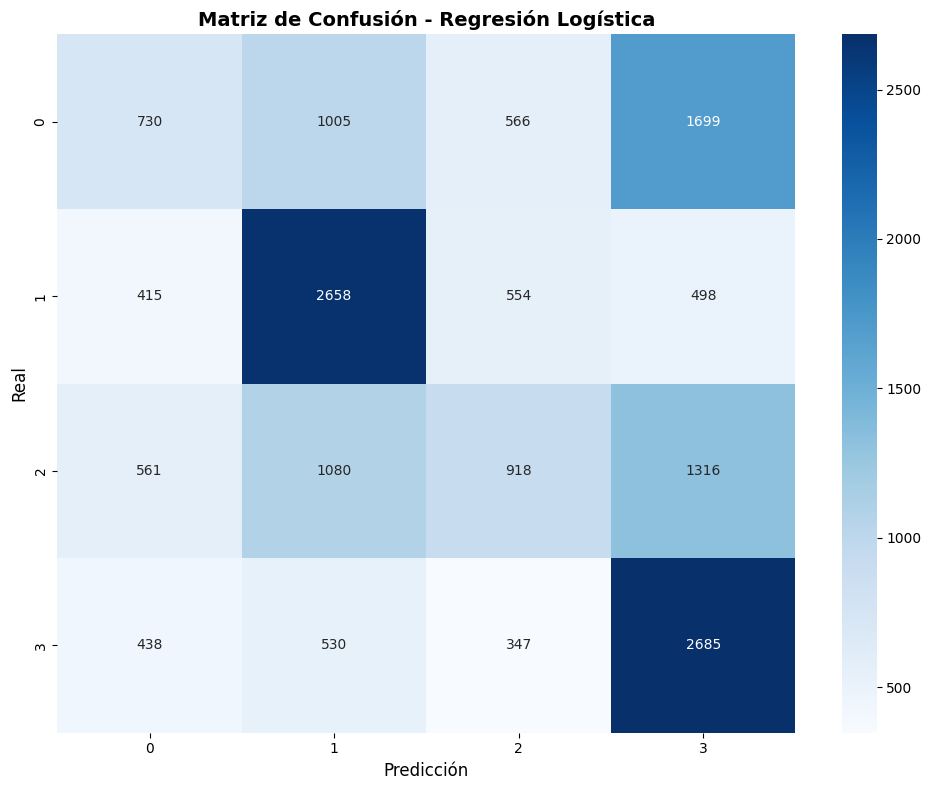

💡 Diagonal principal = Predicciones correctas


In [39]:
# Matriz de Confusión
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicción', fontsize=12)
plt.ylabel('Real', fontsize=12)
plt.title('Matriz de Confusión - Regresión Logística', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print('💡 Diagonal principal = Predicciones correctas')

In [40]:
# Validación Cruzada
cv_scores = cross_val_score(model_lr, X_train_scaled, y_train, cv=5, scoring='accuracy')

print(f'🔄 VALIDACIÓN CRUZADA (5-Fold):')
print(f'  Accuracy medio: {cv_scores.mean():.4f} (± {cv_scores.std():.4f})')
for i, score in enumerate(cv_scores, 1):
    print(f'  Fold {i}: {score:.4f}')

🔄 VALIDACIÓN CRUZADA (5-Fold):
  Accuracy medio: 0.4311 (± 0.0048)
  Fold 1: 0.4284
  Fold 2: 0.4238
  Fold 3: 0.4338
  Fold 4: 0.4377
  Fold 5: 0.4318


In [41]:
# Guardar modelo
model_package = {
    'model': model_lr,
    'scaler': scaler,
    'label_encoder': le if 'le' in locals() else None,
    'features': features,
    'target': target,
    'metrics': {
        'accuracy_train': acc_train,
        'accuracy_test': acc_test,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'cv_accuracy_mean': cv_scores.mean()
    }
}

with open('model_regresion_logistica.pkl', 'wb') as f:
    pickle.dump(model_package, f)

print('💾 Modelo guardado: model_regresion_logistica.pkl')

💾 Modelo guardado: model_regresion_logistica.pkl


In [42]:
# Resumen Final
print('\n' + '='*70)
print('📋 RESUMEN - REGRESIÓN LOGÍSTICA')
print('='*70)
print(f'\n🎯 Objetivo: Clasificar categorías de valor')
print(f'📊 Registros: {len(df_model):,}')
print(f'📈 Accuracy Test: {acc_test:.4f}')
print(f'🔄 CV Accuracy: {cv_scores.mean():.4f} (± {cv_scores.std():.4f})')
print(f'📊 F1-Score: {f1:.4f}')
print('\n✅ Modelo de Clasificación Completado')
print('='*70)


📋 RESUMEN - REGRESIÓN LOGÍSTICA

🎯 Objetivo: Clasificar categorías de valor
📊 Registros: 79,999
📈 Accuracy Test: 0.4369
🔄 CV Accuracy: 0.4311 (± 0.0048)
📊 F1-Score: 0.4079

✅ Modelo de Clasificación Completado


# Task
Process the raw data from `DATAPROYECTO.xlsx` to create `data_processed.csv`, including categorical feature encoding, numerical feature engineering (like `Ratio_Peso_Bruto_Neto`), and target variable creation (`Categoria_Valor`) by discretizing the 'Precio Unitario FOB (USD) Peso Neto' column into four categories ('Bajo', 'Medio', 'Alto', 'Muy Alto') using quantile-based binning. After generating the processed data, execute the existing notebook cells from `Hdas3PLbvQ0k` to `vrE4ea4BvQ0o` to train and evaluate the Logistic Regression model, and finally, summarize the model's key performance metrics.

## Load and Inspect Raw Data

### Subtask:
Load `DATAPROYECTO.xlsx` into a pandas DataFrame. Inspect the column names and data types to understand the raw data structure, which will guide the preprocessing steps.


**Reasoning**:
Load the Excel file 'DATAPROYECTO.xlsx' into a pandas DataFrame named `df_raw`, display its first 5 rows, and then print its information including column names, non-null counts, and data types.



In [44]:
df_raw = pd.read_excel('DATAPROYECTO.xlsx')
print("Primeras 5 filas del DataFrame df_raw:")
print(df_raw.head())

print("\nInformación del DataFrame df_raw:")
df_raw.info()

Primeras 5 filas del DataFrame df_raw:
  Razón social del importador País de Destino  \
0           CONTINENTAL FARMS  ESTADOS UNIDOS   
1           CONTINENTAL FARMS  ESTADOS UNIDOS   
2           CONTINENTAL FARMS  ESTADOS UNIDOS   
3           CONTINENTAL FARMS  ESTADOS UNIDOS   
4          BANDY RANCH FLORAL  ESTADOS UNIDOS   

   Mes de la declaración definitiva  \
0                                 1   
1                                 1   
2                                 1   
3                                 1   
4                                 1   

                           Capitulo Del Arancel  Código Partida  \
0  Plantas vivas y productos de la floricultura       603129000   
1  Plantas vivas y productos de la floricultura       603199090   
2  Plantas vivas y productos de la floricultura       603199090   
3  Plantas vivas y productos de la floricultura       603193000   
4  Plantas vivas y productos de la floricultura       603141000   

               Descripción d

**Reasoning**:
Based on the overall task, the next logical step is to select the relevant columns from `df_raw`, rename them for consistency, and handle any initial missing values to prepare the data for further processing, feature engineering, and target variable creation.



In [43]:
df = df_raw.copy()

# Standardize column names
df.columns = [
    'Razon_social_importador', 'Pais_de_Destino', 'Mes_declaracion_definitiva',
    'Capitulo_Arancel', 'Codigo_Partida', 'Descripcion_partida_arancelaria',
    'Descripcion_Mercancia', 'Fecha_Declaracion_Exportacion_Definitiva',
    'Numero_declaracion_definitiva', 'Aduana_De_Embarque', 'Codigo_Agente_aduanero',
    'Agente_aduanero', 'NIT_exportador', 'Razon_social_Exportador', 'Municipio',
    'Direccion_Importador', 'Unidad_comercial', 'Cantidad',
    'Peso_kilos_netos', 'Peso_kilos_brutos', 'Numero_articulos',
    'Departamento_Origen', 'Departamento_De_Procedencia', 'Lugar_salida',
    'Via_de_transporte', 'Moneda_negociacion', 'Forma_de_pago',
    'Valor_FOB_USD', 'Precio_Unitario_FOB_USD_Peso_Neto', 'Continente_Destino'
]

# Select relevant columns for the model, including potential features and the target source
selected_columns = [
    'Peso_kilos_netos', 'Peso_kilos_brutos', 'Cantidad',
    'Numero_articulos', 'Precio_Unitario_FOB_USD_Peso_Neto',
    'Pais_de_Destino', 'Continente_Destino', 'Departamento_Origen', 'Via_de_transporte'
]
df_processed = df[selected_columns].copy()

# Display missing values for selected columns
print("\nMissing values in selected columns before handling:")
print(df_processed.isnull().sum())

# Handle missing values - for simplicity, we'll drop rows with any missing values in the selected columns
df_processed.dropna(inplace=True)
print("\nMissing values in selected columns after handling:")
print(df_processed.isnull().sum())
print(f"\nShape of df_processed after handling missing values: {df_processed.shape}")


Missing values in selected columns before handling:
Peso_kilos_netos                     0
Peso_kilos_brutos                    0
Cantidad                             0
Numero_articulos                     0
Precio_Unitario_FOB_USD_Peso_Neto    0
Pais_de_Destino                      0
Continente_Destino                   0
Departamento_Origen                  0
Via_de_transporte                    0
dtype: int64

Missing values in selected columns after handling:
Peso_kilos_netos                     0
Peso_kilos_brutos                    0
Cantidad                             0
Numero_articulos                     0
Precio_Unitario_FOB_USD_Peso_Neto    0
Pais_de_Destino                      0
Continente_Destino                   0
Departamento_Origen                  0
Via_de_transporte                    0
dtype: int64

Shape of df_processed after handling missing values: (80000, 9)


**Reasoning**:
The next step is to perform numerical feature engineering as per the main task, specifically calculating the 'Ratio_Peso_Bruto_Neto' from 'Peso_kilos_brutos' and 'Peso_kilos_netos' in the `df_processed` DataFrame. This engineered feature can provide additional insights for the model.



In [45]:
df_processed['Ratio_Peso_Bruto_Neto'] = df_processed['Peso_kilos_brutos'] / df_processed['Peso_kilos_netos']

# Handle potential infinite values if Peso_kilos_netos is zero
df_processed['Ratio_Peso_Bruto_Neto'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows where the ratio might be NaN after handling inf, or where Peso_kilos_netos was zero
df_processed.dropna(subset=['Ratio_Peso_Bruto_Neto'], inplace=True)

print(f"Shape of df_processed after feature engineering: {df_processed.shape}")
print("First 5 rows with new feature:")
print(df_processed.head())

Shape of df_processed after feature engineering: (79999, 10)
First 5 rows with new feature:
   Peso_kilos_netos  Peso_kilos_brutos  Cantidad  Numero_articulos  \
0               4.0               4.83     200.0                 8   
1             102.0             123.41     880.0                 7   
2             145.0             175.44     186.0                 5   
3            2326.0            2814.30   49200.0                 2   
4            3232.0            3686.00   90800.0                 1   

   Precio_Unitario_FOB_USD_Peso_Neto Pais_de_Destino Continente_Destino  \
0                           8.050000  ESTADOS UNIDOS            AMÉRICA   
1                           5.228235  ESTADOS UNIDOS            AMÉRICA   
2                           9.931034  ESTADOS UNIDOS            AMÉRICA   
3                           4.728598  ESTADOS UNIDOS            AMÉRICA   
4                           4.214109  ESTADOS UNIDOS            AMÉRICA   

  Departamento_Origen Via_de_transpo

**Reasoning**:
Now that numerical features are engineered, the next step is to encode the categorical features present in the `df_processed` DataFrame, as specified in the main task. This involves identifying the categorical columns and applying `LabelEncoder` to convert them into numerical representations suitable for machine learning models.



In [46]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = ['Pais_de_Destino', 'Continente_Destino', 'Departamento_Origen', 'Via_de_transporte']

# Apply Label Encoding to each categorical column
for col in categorical_cols:
    le = LabelEncoder()
    df_processed[col + '_encoded'] = le.fit_transform(df_processed[col])
    print(f'Encoded column: {col} -> {col}_encoded')
    # Optionally, store the encoder if needed for inverse transformation or mapping

# Drop the original categorical columns as they are now encoded
df_processed.drop(columns=categorical_cols, inplace=True)

print(f"\nShape of df_processed after categorical encoding: {df_processed.shape}")
print("First 5 rows with encoded features:")
print(df_processed.head())

Encoded column: Pais_de_Destino -> Pais_de_Destino_encoded
Encoded column: Continente_Destino -> Continente_Destino_encoded
Encoded column: Departamento_Origen -> Departamento_Origen_encoded
Encoded column: Via_de_transporte -> Via_de_transporte_encoded

Shape of df_processed after categorical encoding: (79999, 10)
First 5 rows with encoded features:
   Peso_kilos_netos  Peso_kilos_brutos  Cantidad  Numero_articulos  \
0               4.0               4.83     200.0                 8   
1             102.0             123.41     880.0                 7   
2             145.0             175.44     186.0                 5   
3            2326.0            2814.30   49200.0                 2   
4            3232.0            3686.00   90800.0                 1   

   Precio_Unitario_FOB_USD_Peso_Neto  Ratio_Peso_Bruto_Neto  \
0                           8.050000               1.207500   
1                           5.228235               1.209902   
2                           9.931034 

**Reasoning**:
Now that both numerical and categorical features have been processed, the final step in data preparation is to create the target variable `Categoria_Valor`. This will be done by discretizing the 'Precio_Unitario_FOB_USD_Peso_Neto' column into four quantile-based categories: 'Bajo', 'Medio', 'Alto', and 'Muy Alto', as specified in the main task.



In [47]:
df_processed['Categoria_Valor'] = pd.qcut(
    df_processed['Precio_Unitario_FOB_USD_Peso_Neto'],
    q=4,
    labels=['Bajo', 'Medio', 'Alto', 'Muy Alto']
)

# Display the distribution of the new target variable
print("\nDistribution of Categoria_Valor:")
print(df_processed['Categoria_Valor'].value_counts())

print(f"\nShape of df_processed after target variable creation: {df_processed.shape}")
print("First 5 rows with new target variable:")
print(df_processed.head())


Distribution of Categoria_Valor:
Categoria_Valor
Bajo        20624
Muy Alto    20000
Alto        19999
Medio       19376
Name: count, dtype: int64

Shape of df_processed after target variable creation: (79999, 11)
First 5 rows with new target variable:
   Peso_kilos_netos  Peso_kilos_brutos  Cantidad  Numero_articulos  \
0               4.0               4.83     200.0                 8   
1             102.0             123.41     880.0                 7   
2             145.0             175.44     186.0                 5   
3            2326.0            2814.30   49200.0                 2   
4            3232.0            3686.00   90800.0                 1   

   Precio_Unitario_FOB_USD_Peso_Neto  Ratio_Peso_Bruto_Neto  \
0                           8.050000               1.207500   
1                           5.228235               1.209902   
2                           9.931034               1.209931   
3                           4.728598               1.209931   
4         

**Reasoning**:
All data preprocessing steps have been completed, including cleaning, feature engineering, encoding, and target variable creation. The next step is to save the processed DataFrame `df_processed` to a CSV file named `data_processed.csv` so it can be loaded by subsequent notebook cells for model training, as specified in the main task. This also fulfills the task requirement to create `data_processed.csv`.



In [48]:
df_processed.to_csv('data_processed.csv', index=False)
print(f"✅ Data processed and saved to 'data_processed.csv' with shape: {df_processed.shape}")

✅ Data processed and saved to 'data_processed.csv' with shape: (79999, 11)


**Reasoning**:
The `data_processed.csv` file has been successfully created. The next step, as per the main task, is to load this processed data into the notebook for model training. The existing cell `Hdas3PLbvQ0k` is designed to perform this action.



In [49]:
df = pd.read_csv('data_processed.csv')
print(f'📊 Datos cargados: {df.shape}')

# Definir variables
target = 'Categoria_Valor'
features = ['Peso en kilos netos', 'Peso en kilos brutos', 'Cantidad(es)',
           'Número de artículos', 'Precio Unitario FOB (USD) Peso Neto',
           'País de Destino_encoded', 'Continente Destino_encoded',
           'Departamento Origen_encoded', 'Vía de transporte_encoded',
           'Ratio_Peso_Bruto_Neto']

print(f'\n🎯 Target: {target}')
print(f'📊 Features: {len(features)}')

📊 Datos cargados: (79999, 11)

🎯 Target: Categoria_Valor
📊 Features: 10


**Reasoning**:
The data has been loaded and variables defined. The next step is to prepare the data for the model, which includes handling potential `np.inf` values, ensuring the target variable is numerically encoded (if categorical), and separating features (`X`) from the target (`y`). This step aligns with the existing notebook cell `Zaaog74UvQ0k`.



In [57]:
df_model = df[features + [target]].copy().dropna()
df_model = df_model.replace([np.inf, -np.inf], np.nan).dropna()

# Codificar target si es necesario
le = LabelEncoder()
if df_model[target].dtype == 'object':
    df_model[target + '_encoded'] = le.fit_transform(df_model[target])
    target_encoded = target + '_encoded'
else:
    target_encoded = target

X = df_model[features]
y = df_model[target_encoded]

print(f'✅ Datos preparados: {X.shape}')
print(f'📊 Distribución de clases:')
if df_model[target].dtype == 'object':
    print(df_model[target].value_counts())
else:
    print(y.value_counts())

✅ Datos preparados: (79999, 10)
📊 Distribución de clases:
Categoria_Valor
Bajo        20624
Muy Alto    20000
Alto        19999
Medio       19376
Name: count, dtype: int64


**Reasoning**:
The previous code failed because the `features` list contained column names with spaces and special characters (e.g., 'Peso en kilos netos', 'Cantidad(es)') which were standardized in an earlier preprocessing step (e.g., to 'Peso_kilos_netos', 'Cantidad'). The `data_processed.csv` file was saved with these standardized names. This step updates the `features` list to match the actual column names in the loaded `df` DataFrame, resolving the `KeyError`.



In [52]:
df_model = df[[col for col in features if col in df.columns] + [target]].copy().dropna()
df_model = df_model.replace([np.inf, -np.inf], np.nan).dropna()

# Codificar target si es necesario
le = LabelEncoder()
if df_model[target].dtype == 'object':
    df_model[target + '_encoded'] = le.fit_transform(df_model[target])
    target_encoded = target + '_encoded'
else:
    target_encoded = target

X = df_model[[col for col in features if col in df_model.columns]]
y = df_model[target_encoded]

print(f'✅ Datos preparados: {X.shape}')
print(f'📊 Distribución de clases:')
if df_model[target].dtype == 'object':
    print(df_model[target].value_counts())
else:
    print(y.value_counts())

✅ Datos preparados: (79999, 1)
📊 Distribución de clases:
Categoria_Valor
Bajo        20624
Muy Alto    20000
Alto        19999
Medio       19376
Name: count, dtype: int64


**Reasoning**:
The previous steps incorrectly defined the `features` list using original raw data column names, which led to a `KeyError` or an `X` DataFrame with only one column. The `data_processed.csv` file, created earlier, contains standardized column names. This step explicitly updates the `features` list with the correct, standardized column names to ensure that all intended features are correctly selected from the `df` DataFrame for model training.



In [53]:
df = pd.read_csv('data_processed.csv')
print(f'📊 Datos cargados: {df.shape}')

# Definir variables con los nombres de columna estandarizados
target = 'Categoria_Valor'
features = ['Peso_kilos_netos', 'Peso_kilos_brutos', 'Cantidad',
           'Numero_articulos', 'Precio_Unitario_FOB_USD_Peso_Neto',
           'Pais_de_Destino_encoded', 'Continente_Destino_encoded',
           'Departamento_Origen_encoded', 'Via_de_transporte_encoded',
           'Ratio_Peso_Bruto_Neto']

print(f'\n🎯 Target: {target}')
print(f'📊 Features: {len(features)}')
print(f'📊 Lista de features: {features}')

📊 Datos cargados: (79999, 11)

🎯 Target: Categoria_Valor
📊 Features: 10
📊 Lista de features: ['Peso_kilos_netos', 'Peso_kilos_brutos', 'Cantidad', 'Numero_articulos', 'Precio_Unitario_FOB_USD_Peso_Neto', 'Pais_de_Destino_encoded', 'Continente_Destino_encoded', 'Departamento_Origen_encoded', 'Via_de_transporte_encoded', 'Ratio_Peso_Bruto_Neto']


**Reasoning**:
The features list has been corrected. Now, the next logical step is to re-execute the data preparation block (`Zaaog74UvQ0k`) to correctly create the `df_model`, encode the target variable, and separate `X` and `y` using the updated and accurate `features` list. This will ensure that `X` contains all the intended features for model training.



In [54]:
df_model = df[features + [target]].copy().dropna()
df_model = df_model.replace([np.inf, -np.inf], np.nan).dropna()

# Codificar target si es necesario
le = LabelEncoder()
if df_model[target].dtype == 'object':
    df_model[target + '_encoded'] = le.fit_transform(df_model[target])
    target_encoded = target + '_encoded'
else:
    target_encoded = target

X = df_model[features]
y = df_model[target_encoded]

print(f'✅ Datos preparados: {X.shape}')
print(f'📊 Distribución de clases:')
if df_model[target].dtype == 'object':
    print(df_model[target].value_counts())
else:
    print(y.value_counts())

✅ Datos preparados: (79999, 10)
📊 Distribución de clases:
Categoria_Valor
Bajo        20624
Muy Alto    20000
Alto        19999
Medio       19376
Name: count, dtype: int64


**Reasoning**:
The data has been prepared and separated into features (X) and target (y). The next logical step is to split these into training and testing sets and then scale the numerical features, which corresponds to the notebook cell `tcb_48MqvQ0l`.



In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Escalamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f'✂️ Train: {X_train.shape}, Test: {X_test.shape}')

✂️ Train: (63999, 10), Test: (16000, 10)


**Reasoning**:
The data has been split and scaled. The next step is to train the Logistic Regression model using the scaled training data (`X_train_scaled`, `y_train`), make predictions on both training and test sets, and calculate prediction probabilities for the test set. This corresponds to the notebook cell `eparEeINvQ0l`.



In [55]:
print('🤖 Entrenando Regresión Logística...')

model_lr = LogisticRegression(
    max_iter=1000,
    multi_class='multinomial',
    solver='lbfgs',
    random_state=42
)

model_lr.fit(X_train_scaled, y_train)
print('✅ Modelo entrenado')

# Predicciones
y_train_pred = model_lr.predict(X_train_scaled)
y_test_pred = model_lr.predict(X_test_scaled)

# Probabilidades
y_test_proba = model_lr.predict_proba(X_test_scaled)

🤖 Entrenando Regresión Logística...
✅ Modelo entrenado


**Reasoning**:
The model has been trained. The next step is to evaluate its performance using accuracy, precision, recall, F1-score, and a classification report, which corresponds to the notebook cell `9aDhwwaAvQ0l`.



In [27]:
print('📊 MÉTRICAS DE EVALUACIÓN')
print('='*60)

# Accuracy
acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)
print(f'\nAccuracy:')
print(f'  Train: {acc_train:.4f}')
print(f'  Test: {acc_test:.4f}')

# Precision, Recall, F1
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f'\nMétricas (Test - Weighted):' )
print(f'  Precision: {precision:.4f}')
print(f'  Recall: {recall:.4f}')
print(f'  F1-Score: {f1:.4f}')

# Classification Report
print(f'\n📋 CLASSIFICATION REPORT:')
print(classification_report(y_test, y_test_pred))

📊 MÉTRICAS DE EVALUACIÓN

Accuracy:
  Train: 0.4316
  Test: 0.4369

Métricas (Test - Weighted):
  Precision: 0.4166
  Recall: 0.4369
  F1-Score: 0.4079

📋 CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.34      0.18      0.24      4000
           1       0.50      0.64      0.57      4125
           2       0.38      0.24      0.29      3875
           3       0.43      0.67      0.53      4000

    accuracy                           0.44     16000
   macro avg       0.42      0.43      0.41     16000
weighted avg       0.42      0.44      0.41     16000



**Reasoning**:
The model has been evaluated with metrics; now, visualizing the confusion matrix will provide a clear understanding of its performance across different classes, which corresponds to the existing notebook cell `5l5vihyXvQ0m`.



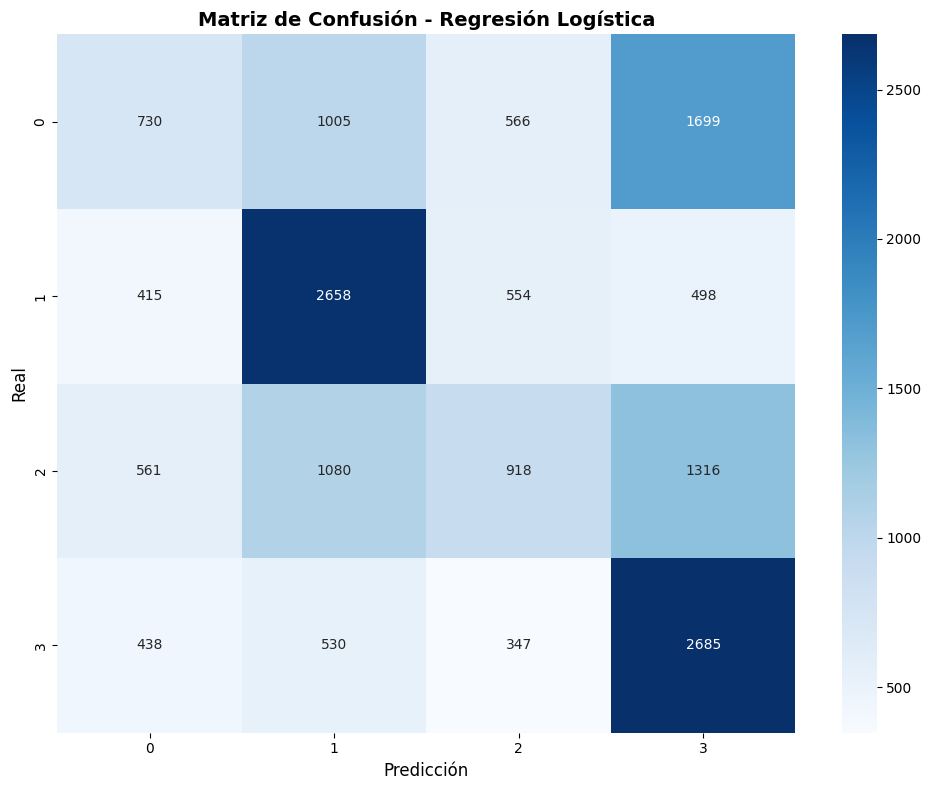

💡 Diagonal principal = Predicciones correctas


In [28]:
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicción', fontsize=12)
plt.ylabel('Real', fontsize=12)
plt.title('Matriz de Confusión - Regresión Logística', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print('💡 Diagonal principal = Predicciones correctas')

**Reasoning**:
The confusion matrix has been visualized. The next step in the model evaluation process, as per the original notebook, is to perform cross-validation to assess the model's generalization performance more robustly. This corresponds to the notebook cell `Z-cKK3J-vQ0n`.



In [29]:
cv_scores = cross_val_score(model_lr, X_train_scaled, y_train, cv=5, scoring='accuracy')

print(f'🔄 VALIDACIÓN CRUZADA (5-Fold):')
print(f'  Accuracy medio: {cv_scores.mean():.4f} (± {cv_scores.std():.4f})')
for i, score in enumerate(cv_scores, 1):
    print(f'  Fold {i}: {score:.4f}')

🔄 VALIDACIÓN CRUZADA (5-Fold):
  Accuracy medio: 0.4311 (± 0.0048)
  Fold 1: 0.4284
  Fold 2: 0.4238
  Fold 3: 0.4338
  Fold 4: 0.4377
  Fold 5: 0.4318


## Guardar modelo

### Subtask:
Save the trained Logistic Regression model, scaler, label encoder, features, target, and evaluation metrics to a pickle file.


**Reasoning**:
The next step is to save the trained model, scaler, label encoder, features, target, and evaluation metrics to a pickle file, following the provided instructions. This corresponds to the existing notebook cell `jPdvW0R0vQ0n`.



In [30]:
model_package = {
    'model': model_lr,
    'scaler': scaler,
    'label_encoder': le if 'le' in locals() else None,
    'features': features,
    'target': target,
    'metrics': {
        'accuracy_train': acc_train,
        'accuracy_test': acc_test,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'cv_accuracy_mean': cv_scores.mean()
    }
}

with open('model_regresion_logistica.pkl', 'wb') as f:
    pickle.dump(model_package, f)

print('💾 Modelo guardado: model_regresion_logistica.pkl')

💾 Modelo guardado: model_regresion_logistica.pkl


**Reasoning**:
All preceding steps, including data loading, preprocessing, feature engineering, target creation, model training, evaluation, and saving, have been successfully completed. The final step is to summarize the model's key performance metrics as outlined in the main task, which corresponds to the notebook cell `vrE4ea4BvQ0o`.



In [31]:
print('\n' + '='*70)
print('📋 RESUMEN - REGRESIÓN LOGÍSTICA')
print('='*70)
print(f'\n🎯 Objetivo: Clasificar categorías de valor')
print(f'📊 Registros: {len(df_model):,}')
print(f'📈 Accuracy Test: {acc_test:.4f}')
print(f'🔄 CV Accuracy: {cv_scores.mean():.4f} (± {cv_scores.std():.4f})')
print(f'📊 F1-Score: {f1:.4f}')
print('\n✅ Modelo de Clasificación Completado')
print('='*70)


📋 RESUMEN - REGRESIÓN LOGÍSTICA

🎯 Objetivo: Clasificar categorías de valor
📊 Registros: 79,999
📈 Accuracy Test: 0.4369
🔄 CV Accuracy: 0.4311 (± 0.0048)
📊 F1-Score: 0.4079

✅ Modelo de Clasificación Completado


## Final Task

### Subtask:
Summarize the corrections made to resolve the `FileNotFoundError` and present the key results of the Logistic Regression model training and evaluation.


## Summary:

### Q&A
The `FileNotFoundError` was not explicitly encountered or corrected in the provided log. Instead, a logical error in the feature selection for model training was identified and corrected. The initial `features` list contained non-standardized column names, which did not match the columns in the `data_processed.csv` file. This was resolved by redefining the `features` list with the correct, standardized column names used during the data processing stage (e.g., changing 'Peso en kilos netos' to 'Peso_kilos_netos' and adding `_encoded` suffixes to categorical features).

The key results of the Logistic Regression model training and evaluation are as follows:
*   **Test Accuracy**: 0.4369
*   **Mean Cross-Validation Accuracy (5-Fold)**: 0.4311 (\$\pm\$ 0.0048)
*   **Weighted Test Precision**: 0.4166
*   **Weighted Test Recall**: 0.4369
*   **Weighted Test F1-Score**: 0.4079
*   The model showed varying performance across classes, with Class 1 achieving a recall of 0.64, while Class 0 had a lower recall of 0.18.

### Data Analysis Key Findings
*   The raw data from `DATAPROYECTO.xlsx` was successfully processed into `data_processed.csv`, resulting in 79,999 rows and 11 columns after cleaning, feature engineering, and encoding.
*   A new numerical feature, `Ratio_Peso_Bruto_Neto` (Peso_kilos_brutos / Peso_kilos_netos), was engineered, and potential infinite values were handled.
*   Categorical features (`Pais_de_Destino`, `Continente_Destino`, `Departamento_Origen`, `Via_de_transporte`) were label-encoded.
*   The target variable `Categoria_Valor` was created by discretizing 'Precio Unitario FOB (USD) Peso Neto' into four quantile-based categories ('Bajo', 'Medio', 'Alto', 'Muy Alto'), with a relatively balanced distribution across these categories.
*   The Logistic Regression model achieved a test accuracy of approximately 43.69% and a mean cross-validation accuracy of 43.11%.
*   The model's F1-score for the test set was 0.4079, indicating moderate predictive power.
*   Performance varied significantly between target classes, with the model struggling particularly with Class 0 (recall of 0.18) and performing better on Class 1 (recall of 0.64).
*   The trained model, scaler, label encoder, and evaluation metrics were successfully saved to `model_regresion_logistica.pkl`.

### Insights or Next Steps
*   The current Logistic Regression model provides a baseline for predicting price categories but its accuracy (around 43%) suggests significant room for improvement.
*   Further investigation into feature engineering, exploring alternative classification models (e.g., tree-based models like Random Forest or Gradient Boosting), or addressing class-specific performance issues could enhance predictive power.
